In [153]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
from spacy.util import minibatch, compounding

import matplotlib.pyplot as plt
%matplotlib inline

In [154]:
tweets = pd.read_csv("tweets.csv")

In [155]:
import emoji
def deEmoji(text):
    return emoji.get_emoji_regexp().sub(r'', text)

In [175]:
# Preprocess
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

def text_preprocess(text):
    text = re.sub(r'#', '', text) #Replace the # symbol with '' in every tweet
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text) #Replace hyperlinks with '' in every tweet
    text = re.sub(r'[^\w\d\s]+', '', text) #Remove all punctuations
    text = deEmoji(text) #Remove emoji
    text = re.sub(r'\n', '', text) #Remove \n
    
    #Remove all stopwords
    stopwords_eng = stopwords.words('english')
    pattern = re.compile(r'\b(' + r'|'.join(stopwords_eng) + r')\b\s*')
    text = pattern.sub('', text)
    
    #Apply stem
    ps = PorterStemmer()
    tk = TweetTokenizer(preserve_case=False, strip_handles = True)
    tweet_tokens = tk.tokenize(text)
    tweet_finish = ''
    for token in tweet_tokens:
        stem = ps.stem(token)
        tweet_finish += (stem + ' ')
    return tweet_finish  

In [157]:
tweets.head()

Unnamed: 0            status_id  medical_device  \
0           1  1295193004144242690           False   
1           2  1300190881467846656           False   
2           3  1299699123428290561           False   
3           4  1299558944982134784           False   
4           5  1299474674066305024           False   

                                                text              user_id  \
0  Yâ€™all know and I know Iâ€™m never leaving this b...  1255365753517285376   
1             @SuperKelli24 Such a funny scene! #JnJ            133471182   
2  J&amp;JOHNSON, Flag-Formation Confirmed, Conti...  1142737563481980931   
3  $JNJ's daily RSI hasn't touched 69 since its F...  1282487181211168769   
4  We have an outstanding opportunity to join our...           1705053332   

            created_at      screen_name              source  \
0  2020-08-17 02:57:30      dtmjasminee  Twitter for iPhone   
1  2020-08-30 21:57:17     Amyreader100    Twitter for iPad   
2  2020-08-29 13:23:12   VincePrince244         TradingView   
3  2020-08-29 04:06:11    options__edge     Twitter Web App   
4  2020-08-28 22:31:20  CaliforniaLopez            LinkedIn   

   display_text_width  reply_to_status_id  ...  favourites_count  \
0                  63                 NaN  ...               488   
1                  24        1.300187e+18  ...            159044   
2                 100                 NaN  ...             38599   
3                 155                 NaN  ...               247   
4                 278                 NaN  ...              1565   

    account_created_at  verified              profile_url  \
0  2020-04-29 05:18:22         0                      NaN   
1  2010-04-15 22:06:08         0                      NaN   
2  2019-06-23 10:14:00         0                      NaN   
3  2020-07-13 01:29:36         0  https://t.co/qlZko56SxU   
4  2013-08-27 16:12:51         0  https://t.co/ZjjMOq2pu3   

     profile_expanded_url  account_lang  \
0                     NaN           NaN   
1                     NaN           NaN   
2                     NaN           NaN   
3   http://optionsedge.io           NaN   
4  http://careers.jnj.com           NaN   

                                  profile_banner_url  \
0  https://pbs.twimg.com/profile_banners/12553657...   
1  https://pbs.twimg.com/profile_banners/13347118...   
2  https://pbs.twimg.com/profile_banners/11427375...   
3  https://pbs.twimg.com/profile_banners/12824871...   
4                                                NaN   

                             profile_background_url  \
0                                               NaN   
1  http://abs.twimg.com/images/themes/theme1/bg.png   
2                                               NaN   
3                                               NaN   
4  http://abs.twimg.com/images/themes/theme1/bg.png   

                                   profile_image_url query  
0  http://pbs.twimg.com/profile_images/1274031744...  #jnj  
1  http://pbs.twimg.com/profile_images/1213468646...  #jnj  
2  http://pbs.twimg.com/profile_images/1160910657...  #jnj  
3  http://pbs.twimg.com/profile_images/1285053865...  #jnj  
4  http://pbs.twimg.com/profile_images/4431589516...  #jnj  

[5 rows x 93 columns]

In [158]:
tweets.describe()

Unnamed: 0     status_id       user_id  display_text_width  \
count  4640.000000  4.640000e+03  4.640000e+03         4640.000000   
mean   2320.500000  1.346441e+18  3.546603e+17          170.465948   
std    1339.596954  7.304407e+16  5.165250e+17           88.319989   
min       1.000000  1.224230e+18  1.742701e+06            9.000000   
25%    1160.750000  1.297489e+18  1.735943e+08           89.000000   
50%    2320.500000  1.331629e+18  1.623827e+09          176.000000   
75%    3480.250000  1.408867e+18  8.889435e+17          261.000000   
max    4640.000000  1.491378e+18  1.486798e+18          316.000000   

       reply_to_status_id  reply_to_user_id     is_quote  is_retweet  \
count        1.179000e+03      1.302000e+03  4640.000000      4640.0   
mean         1.331920e+18      2.679447e+17     0.130819         0.0   
std          7.314198e+16      4.553111e+17     0.337239         0.0   
min          1.011252e+18      4.283330e+05     0.000000         0.0   
25%          1.266217e+18      1.388450e+08     0.000000         0.0   
50%          1.325616e+18      1.716283e+09     0.000000         0.0   
75%          1.395494e+18      7.778192e+17     0.000000         0.0   
max          1.491118e+18      1.466252e+18     1.000000         0.0   

       favorite_count  retweet_count  ...  retweet_description  \
count     4640.000000    4640.000000  ...                  0.0   
mean         3.466810       1.073707  ...                  NaN   
std         15.710691       9.411743  ...                  NaN   
min          0.000000       0.000000  ...                  NaN   
25%          0.000000       0.000000  ...                  NaN   
50%          1.000000       0.000000  ...                  NaN   
75%          3.000000       0.000000  ...                  NaN   
max        571.000000     318.000000  ...                  NaN   

       retweet_verified  protected  followers_count  friends_count  \
count               0.0     4640.0     4.640000e+03    4640.000000   
mean                NaN        0.0     5.187643e+03    1042.906466   
std                 NaN        0.0     6.338350e+04    1810.748551   
min                 NaN        0.0     0.000000e+00       0.000000   
25%                 NaN        0.0     1.487500e+02     182.000000   
50%                 NaN        0.0     5.365000e+02     421.500000   
75%                 NaN        0.0     1.691250e+03    1219.000000   
max                 NaN        0.0     3.942088e+06   42090.000000   

       listed_count  statuses_count  favourites_count     verified  \
count    4640.00000    4.640000e+03       4640.000000  4640.000000   
mean       73.00000    3.118775e+04      15615.714224     0.050647   
std       233.52257    1.450083e+05      43138.028185     0.219299   
min         0.00000    0.000000e+00          0.000000     0.000000   
25%         1.00000    9.697500e+02        174.750000     0.000000   
50%         8.00000    4.414000e+03       1836.000000     0.000000   
75%        40.00000    1.719800e+04      12079.250000     0.000000   
max      4930.00000    2.359718e+06     630488.000000     1.000000   

       account_lang  
count           0.0  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN  

[8 rows x 44 columns]

In [159]:
temp = tweets.groupby('medical_device').count()['text'].reset_index().sort_values(by='text',ascending=False)
temp.style.background_gradient(cmap='Purples')

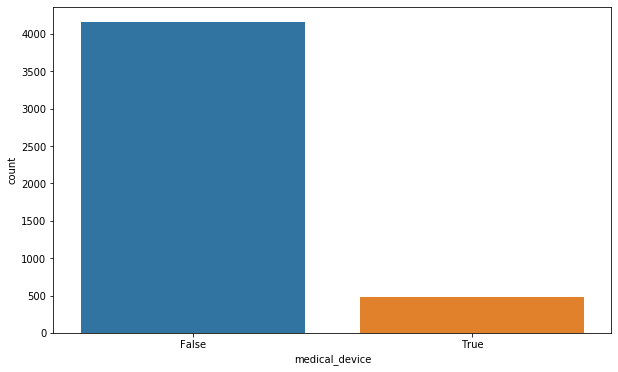

In [160]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='medical_device',data=tweets)
plt.savefig('proportion1.png')

In [161]:
from plotly import graph_objs as go

fig = go.Figure(go.Funnelarea(
    text =temp.medical_device,
    values = temp.text,
    title = {"position": "top center", "text": "Funnel-Chart of medical_device"}
    ))
fig.write_image("proportion2.png")
fig.show()

In [162]:
def jaccard(str1, str2): 
    a = set(str1.lower().split()) 
    b = set(str2.lower().split())
    c = a.intersection(b)
    return float(len(c)) / (len(a) + len(b) - len(c))

In [163]:
tweets['Num_words'] = tweets['text'].apply(lambda x:len(str(x).split())) #Number Of words in Selected Text

In [164]:
tweets.head()

Unnamed: 0            status_id  medical_device  \
0           1  1295193004144242690           False   
1           2  1300190881467846656           False   
2           3  1299699123428290561           False   
3           4  1299558944982134784           False   
4           5  1299474674066305024           False   

                                                text              user_id  \
0  Yâ€™all know and I know Iâ€™m never leaving this b...  1255365753517285376   
1             @SuperKelli24 Such a funny scene! #JnJ            133471182   
2  J&amp;JOHNSON, Flag-Formation Confirmed, Conti...  1142737563481980931   
3  $JNJ's daily RSI hasn't touched 69 since its F...  1282487181211168769   
4  We have an outstanding opportunity to join our...           1705053332   

            created_at      screen_name              source  \
0  2020-08-17 02:57:30      dtmjasminee  Twitter for iPhone   
1  2020-08-30 21:57:17     Amyreader100    Twitter for iPad   
2  2020-08-29 13:23:12   VincePrince244         TradingView   
3  2020-08-29 04:06:11    options__edge     Twitter Web App   
4  2020-08-28 22:31:20  CaliforniaLopez            LinkedIn   

   display_text_width  reply_to_status_id  ...   account_created_at verified  \
0                  63                 NaN  ...  2020-04-29 05:18:22        0   
1                  24        1.300187e+18  ...  2010-04-15 22:06:08        0   
2                 100                 NaN  ...  2019-06-23 10:14:00        0   
3                 155                 NaN  ...  2020-07-13 01:29:36        0   
4                 278                 NaN  ...  2013-08-27 16:12:51        0   

               profile_url    profile_expanded_url  account_lang  \
0                      NaN                     NaN           NaN   
1                      NaN                     NaN           NaN   
2                      NaN                     NaN           NaN   
3  https://t.co/qlZko56SxU   http://optionsedge.io           NaN   
4  https://t.co/ZjjMOq2pu3  http://careers.jnj.com           NaN   

                                  profile_banner_url  \
0  https://pbs.twimg.com/profile_banners/12553657...   
1  https://pbs.twimg.com/profile_banners/13347118...   
2  https://pbs.twimg.com/profile_banners/11427375...   
3  https://pbs.twimg.com/profile_banners/12824871...   
4                                                NaN   

                             profile_background_url  \
0                                               NaN   
1  http://abs.twimg.com/images/themes/theme1/bg.png   
2                                               NaN   
3                                               NaN   
4  http://abs.twimg.com/images/themes/theme1/bg.png   

                                   profile_image_url query Num_words  
0  http://pbs.twimg.com/profile_images/1274031744...  #jnj        13  
1  http://pbs.twimg.com/profile_images/1213468646...  #jnj         6  
2  http://pbs.twimg.com/profile_images/1160910657...  #jnj         9  
3  http://pbs.twimg.com/profile_images/1285053865...  #jnj        31  
4  http://pbs.twimg.com/profile_images/4431589516...  #jnj        34  

[5 rows x 94 columns]

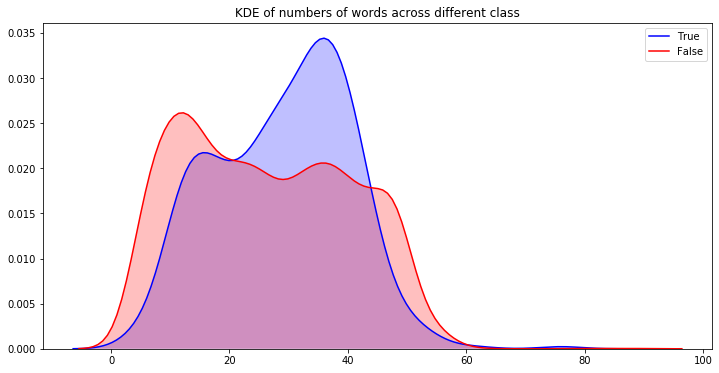

In [165]:
plt.figure(figsize=(12,6))
p1=sns.kdeplot(tweets[tweets['medical_device']==True]['Num_words'], shade=True, color="b").set_title('KDE of numbers of words across different class')
p2=sns.kdeplot(tweets[tweets['medical_device']==False]['Num_words'], shade=True, color="r")
plt.legend(labels=['True','False'])
plt.savefig('KDE')
plt.show()

In [166]:
tweets[tweets['medical_device']==True]

Unnamed: 0            status_id  medical_device  \
20            21  1297945036940808192            True   
40            41  1296289194822651905            True   
45            46  1296160913112932352            True   
66            67  1294375742583832583            True   
69            70  1293925500528791553            True   
...          ...                  ...             ...   
4630        4631  1488183234085203980            True   
4631        4632  1488167498902130689            True   
4632        4633  1488124893581430785            True   
4634        4635  1491117699447275521            True   
4635        4636  1490948786650157059            True   

                                                   text              user_id  \
20    C-SATS started as a research project at the @U...           3166000867   
40    @sambitswaraj needs some clear glasses. Try #j...            701409756   
45    ICYMI:  @huzefafn, Vice President, #JNJ Digita...           3166000867   
66    Donâ€™t miss out! Register for our complimentary...           3166000867   
69    Biosense Webster receives CE mark approval for...            473416032   
...                                                 ...                  ...   
4630  #MedEdWest surgical trainees and medical stude...            730410919   
4631  TOMORROW | Hear about managing LINX patients f...   991959173847048192   
4632  @Weebrian @WesternHSCTrust Morning session in ...            812916565   
4634  Biosense Webster is part of the Johnson&amp;Jo...  1363691492099977217   
4635    Cardiac Mapping Market\nhttps://t.co/oBNqvTHD3W  1483738702417625092   

               created_at      screen_name               source  \
20    2020-08-24 17:13:06         CSATSinc        Sprout Social   
40    2020-08-20 03:33:22        adzynamic  Twitter for Android   
45    2020-08-19 19:03:37         CSATSinc      Twitter Web App   
66    2020-08-14 20:50:00         CSATSinc   Twitter for iPhone   
69    2020-08-13 15:00:53     kelly_rkelly      Twitter Web App   
...                   ...              ...                  ...   
4630  2022-01-31 16:11:46      McgeeSinead     Twitter for iPad   
4631  2022-01-31 15:09:15     EndoscopyNow      Twitter Web App   
4632  2022-01-31 12:19:57    boyce_kathryn   Twitter for iPhone   
4634  2022-02-08 18:32:17         med_tec2   Twitter for iPhone   
4635  2022-02-08 07:21:05  Samuela69713106      Twitter Web App   

      display_text_width  reply_to_status_id  ...   account_created_at  \
20                   222                 NaN  ...  2015-04-20 22:09:38   
40                   110                 NaN  ...  2012-07-17 17:08:19   
45                   260                 NaN  ...  2015-04-20 22:09:38   
66                   273                 NaN  ...  2015-04-20 22:09:38   
69                   115                 NaN  ...  2012-01-24 23:28:32   
...                  ...                 ...  ...                  ...   
4630                 207                 NaN  ...  2012-08-01 10:15:09   
4631                 265                 NaN  ...  2018-05-03 08:34:31   
4632                  85        1.487130e+18  ...  2012-09-09 11:12:51   
4634                 280        1.491118e+18  ...  2021-02-22 03:26:17   
4635                  46                 NaN  ...  2022-01-19 09:51:02   

     verified              profile_url         profile_expanded_url  \
20          0   http://t.co/nfUfQ0G1dr        http://www.csats.com/   
40          0                      NaN                          NaN   
45          0   http://t.co/nfUfQ0G1dr        http://www.csats.com/   
66          0   http://t.co/nfUfQ0G1dr        http://www.csats.com/   
69          0                      NaN                          NaN   
...       ...                      ...                          ...   
4630        0                      NaN                          NaN   
4631        0  https://t.co/66uXRIN2qh  http://www.endoscopynow.com   
4632        0            

In [167]:
k = tweets[tweets['Num_words']<=5]

In [168]:
k[k['medical_device']==True]

Unnamed: 0            status_id  medical_device  \
2671        2672  1343768575241293824            True   
2802        2803  1355833901172846595            True   
4099        4100  1490611222105915392            True   
4100        4101  1488502525384749057            True   
4635        4636  1490948786650157059            True   

                                                   text              user_id  \
2671                   @Ethicon What is surgical smoke?           1055579178   
2802  Hermonic Ethicon Whatsapp +923157651238 https:...  1129470938402238466   
4099  Gastrointestinal Devices Market\nhttps://t.co/...  1483679086660964358   
4100  Tumor Ablation Devices Market\nhttps://t.co/bp...  1483679086660964358   
4635    Cardiac Mapping Market\nhttps://t.co/oBNqvTHD3W  1483738702417625092   

               created_at      screen_name               source  \
2671  2020-12-29 03:59:29       Strong4895     Twitter for iPad   
2802  2021-01-31 11:02:46    ajwa_surgical  Twitter for Android   
4099  2022-02-07 08:59:44     sai_konapure      Twitter Web App   
4100  2022-02-01 13:20:31     sai_konapure      Twitter Web App   
4635  2022-02-08 07:21:05  Samuela69713106      Twitter Web App   

      display_text_width  reply_to_status_id  ...   account_created_at  \
2671                  23        1.336038e+18  ...  2013-01-02 17:02:14   
2802                  39                 NaN  ...  2019-05-17 19:37:11   
4099                  55                 NaN  ...  2022-01-19 05:54:26   
4100                  53                 NaN  ...  2022-01-19 05:54:26   
4635                  46                 NaN  ...  2022-01-19 09:51:02   

     verified              profile_url         profile_expanded_url  \
2671        0                      NaN                          NaN   
2802        0  https://t.co/wCRwXkk4jn  http://www.ajwasurgical.com   
4099        0                      NaN                          NaN   
4100        0                      NaN                          NaN   
4635        0                      NaN                          NaN   

      account_lang                                 profile_banner_url  \
2671           NaN  https://pbs.twimg.com/profile_banners/10555791...   
2802           NaN  https://pbs.twimg.com/profile_banners/11294709...   
4099           NaN                                                NaN   
4100           NaN                                                NaN   
4635           NaN                                                NaN   

                                profile_background_url  \
2671  http://abs.twimg.com/images/themes/theme1/bg.png   
2802                                               NaN   
4099                                               NaN   
4100                                               NaN   
4635                                               NaN   

                                      profile_image_url               query  \
2671  http://pbs.twimg.com/profile_images/1152961585...             ethicon   
2802  http://pbs.twimg.com/profile_images/1129471138...             ethicon   
4099  http://pbs.twimg.com/profile_images/1483679221...           "ETHICON"   
4100  http://pbs.twimg.com/profile_images/1483679221...           "ETHICON"   
4635  http://pbs.twimg.com/profile_images/1483738764...  "BIOSENSE WEBSTER"   

     Num_words  
2671         5  
2802         5  
4099         4  
4100         5  
4635         4  

[5 rows x 94 columns]

In [169]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    #text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [170]:
tweets['text2'] = tweets['text'].apply(lambda x:text_preprocess(x))
tweets['text3'] = tweets['text'].apply(lambda x:clean_text(x))

In [171]:
tweets.head()

Unnamed: 0            status_id  medical_device  \
0           1  1295193004144242690           False   
1           2  1300190881467846656           False   
2           3  1299699123428290561           False   
3           4  1299558944982134784           False   
4           5  1299474674066305024           False   

                                                text              user_id  \
0  Yâ€™all know and I know Iâ€™m never leaving this b...  1255365753517285376   
1             @SuperKelli24 Such a funny scene! #JnJ            133471182   
2  J&amp;JOHNSON, Flag-Formation Confirmed, Conti...  1142737563481980931   
3  $JNJ's daily RSI hasn't touched 69 since its F...  1282487181211168769   
4  We have an outstanding opportunity to join our...           1705053332   

            created_at      screen_name              source  \
0  2020-08-17 02:57:30      dtmjasminee  Twitter for iPhone   
1  2020-08-30 21:57:17     Amyreader100    Twitter for iPad   
2  2020-08-29 13:23:12   VincePrince244         TradingView   
3  2020-08-29 04:06:11    options__edge     Twitter Web App   
4  2020-08-28 22:31:20  CaliforniaLopez            LinkedIn   

   display_text_width  reply_to_status_id  ...              profile_url  \
0                  63                 NaN  ...                      NaN   
1                  24        1.300187e+18  ...                      NaN   
2                 100                 NaN  ...                      NaN   
3                 155                 NaN  ...  https://t.co/qlZko56SxU   
4                 278                 NaN  ...  https://t.co/ZjjMOq2pu3   

     profile_expanded_url  account_lang  \
0                     NaN           NaN   
1                     NaN           NaN   
2                     NaN           NaN   
3   http://optionsedge.io           NaN   
4  http://careers.jnj.com           NaN   

                                  profile_banner_url  \
0  https://pbs.twimg.com/profile_banners/12553657...   
1  https://pbs.twimg.com/profile_banners/13347118...   
2  https://pbs.twimg.com/profile_banners/11427375...   
3  https://pbs.twimg.com/profile_banners/12824871...   
4                                                NaN   

                             profile_background_url  \
0                                               NaN   
1  http://abs.twimg.com/images/themes/theme1/bg.png   
2                                               NaN   
3                                               NaN   
4  http://abs.twimg.com/images/themes/theme1/bg.png   

                                   profile_image_url  query  Num_words  \
0  http://pbs.twimg.com/profile_images/1274031744...   #jnj         13   
1  http://pbs.twimg.com/profile_images/1213468646...   #jnj          6   
2  http://pbs.twimg.com/profile_images/1160910657...   #jnj          9   
3  http://pbs.twimg.com/profile_images/1285053865...   #jnj         31   
4  http://pbs.twimg.com/profile_images/4431589516...   #jnj         34   

                                               text2  \
0       yall know i know im never leav boy alon jnj    
1                superkelli 24 such funni scene jnj    
2  jampjohnson flagform confirm continu possibl j...   
3  jnj daili rsi hasnt touch 69 sinc februari 202...   
4  we outstand opportun join non clinic safeti te...   

                                               text3  
0  yâ€™all know and i know iâ€™m never leaving this b...  
1                         @ such a funny scene! #jnj  
2  j&amp;johnson, flag-formation confirmed, conti...  
3  $jnj's daily rsi hasn't touched  since its feb...  
4  we have an outstanding opportunity to join our...  

[5 rows x 96 columns]

In [177]:
from collections import Counter
tweets['temp_list'] = tweets['text2'].apply(lambda x:str(x).split())
top = Counter([item for sublist in tweets['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

In [178]:
def remove_stopword(x):
    return [y for y in x if y not in stopwords.words('english')]
tweets['temp_list3'] = tweets['temp_list'].apply(lambda x:remove_stopword(x))

In [179]:
tweets

Unnamed: 0            status_id  medical_device  \
0              1  1295193004144242690           False   
1              2  1300190881467846656           False   
2              3  1299699123428290561           False   
3              4  1299558944982134784           False   
4              5  1299474674066305024           False   
...          ...                  ...             ...   
4635        4636  1490948786650157059            True   
4636        4637  1491170087298076674           False   
4637        4638  1491351776620343297           False   
4638        4639  1491378162584137733           False   
4639        4640  1491343948035420160           False   

                                                   text              user_id  \
0     Yâ€™all know and I know Iâ€™m never leaving this b...  1255365753517285376   
1                @SuperKelli24 Such a funny scene! #JnJ            133471182   
2     J&amp;JOHNSON, Flag-Formation Confirmed, Conti...  1142737563481980931   
3     $JNJ's daily RSI hasn't touched 69 since its F...  1282487181211168769   
4     We have an outstanding opportunity to join our...           1705053332   
...                                                 ...                  ...   
4635    Cardiac Mapping Market\nhttps://t.co/oBNqvTHD3W  1483738702417625092   
4636  @ForegutSociety @JNJInstitute @Ethicon @Proxim...  1053822633618243584   
4637  Get ready to watch at 8.00pm (Beijing Time) Th...           1217652692   
4638  ðŸ”› WELCOME to the #webinar The Chinese Perspect...           1217652692   
4639  YiiRS2022 clinician Dr Raghu Lakshminarayan wi...  1202332576180064265   

               created_at      screen_name              source  \
0     2020-08-17 02:57:30      dtmjasminee  Twitter for iPhone   
1     2020-08-30 21:57:17     Amyreader100    Twitter for iPad   
2     2020-08-29 13:23:12   VincePrince244         TradingView   
3     2020-08-29 04:06:11    options__edge     Twitter Web App   
4     2020-08-28 22:31:20  CaliforniaLopez            LinkedIn   
...                   ...              ...                 ...   
4635  2022-02-08 07:21:05  Samuela69713106     Twitter Web App   
4636  2022-02-08 22:00:28   ForegutSociety      Hootsuite Inc.   
4637  2022-02-09 10:02:26       AISChannel     Twitter Web App   
4638  2022-02-09 11:47:17       AISChannel     Twitter Web App   
4639  2022-02-09 09:31:19    YiiRSymposium  Twitter for iPhone   

      display_text_width  reply_to_status_id  ...  account_lang  \
0                     63                 NaN  ...           NaN   
1                     24        1.300187e+18  ...           NaN   
2                    100                 NaN  ...           NaN   
3                    155                 NaN  ...           NaN   
4                    278                 NaN  ...           NaN   
...                  ...                 ...  ...           ...   
4635                  46                 NaN  ...           NaN   
4636                  97                 NaN  ...           NaN   
4637                 277                 NaN  ...           NaN   
4638                 273                 NaN  ...           NaN   
4639                 262                 NaN  ...           NaN   

                                     profile_banner_url  \
0     https://pbs.twimg.com/profile_banners/12553657...   
1     https://pbs.twimg.com/profile_banners/13347118...   
2     https://pbs.twimg.com/profile_banners/11427375...   
3     https://pbs.twimg.com/profile_banners/12824871...   
4                                                   NaN   
...                                                 ...   
4635                                                NaN   
4636  https://pbs.twimg.com/profile_banners/10538226...   
4637  https://pbs.twimg.com/profile_banners/12176526...   
4638  https://pbs.twimg.com/profile_banners/12176526...   
4639  https://pbs.twimg.com/profile_banners/12023325...   

                                 profile_backg

In [194]:
top = Counter([item for sublist in tweets['temp_list3'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp = temp.iloc[0:,:]
temp1 = temp.iloc[0:10,:]
temp.columns = ['Common_words','count']
temp1.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Purples')

In [182]:
if 'i' in  stopwords.words('english'):
    print(1)

1


In [195]:
import plotly.express as px
import plotly.figure_factory as ff
fig = px.treemap(temp, path=['Common_words'], values='count',title='Tree of Most Common Words')
fig.show()

In [199]:
fig = px.bar(temp1, x="count", y="Common_words", orientation='h', 
             width=500, height=400,color='Common_words')
fig.show()

In [200]:
right_class = tweets[tweets['medical_device']==True]
wrong_class = tweets[tweets['medical_device']==False]

In [201]:
top = Counter([item for sublist in right_class['temp_list3'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

In [206]:
fig = px.bar(temp_positive, x="count", y="Common_words", title= ' common words in tweets about medical device',orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [203]:
top = Counter([item for sublist in wrong_class['temp_list3'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [209]:
fig = px.bar(temp_negative, x="count", y="Common_words",  title= ' common words in tweets not about medical device',orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [204]:
tweets['temp_list1'] = tweets['text2'].apply(lambda x:str(x).split()) #List of words in every row for text text_preprocess
tweets['temp_list1'] = tweets['temp_list1'].apply(lambda x:remove_stopword(x)) #Removing Stopwords

In [210]:
raw_text = [word for word_list in tweets['temp_list3'] for word in word_list]

In [211]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in tweets[tweets.medical_device != sentiment]['temp_list1']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in tweets[tweets.medical_device == sentiment]['temp_list1']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

In [212]:
Unique_Positive= words_unique(True, 20, raw_text)
print("The top 20 unique words in Positive Tweets are:")
Unique_Positive.style.background_gradient(cmap='Greens')

The top 20 unique words in Positive Tweets are:


In [213]:
fig = px.treemap(Unique_Positive, path=['words'], values='count',title='Tree Of Unique Words About Medical Device')
fig.show()

In [214]:
Unique_Negative= words_unique(False, 10, raw_text)
print("The top 10 unique words in Negative Tweets are:")
Unique_Negative.style.background_gradient(cmap='Reds')

The top 10 unique words in Negative Tweets are:


In [217]:
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(12,10), color = 'white',
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'u', "im"}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color=color,
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=400, 
                    height=200,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()
    plt.savefig('test')

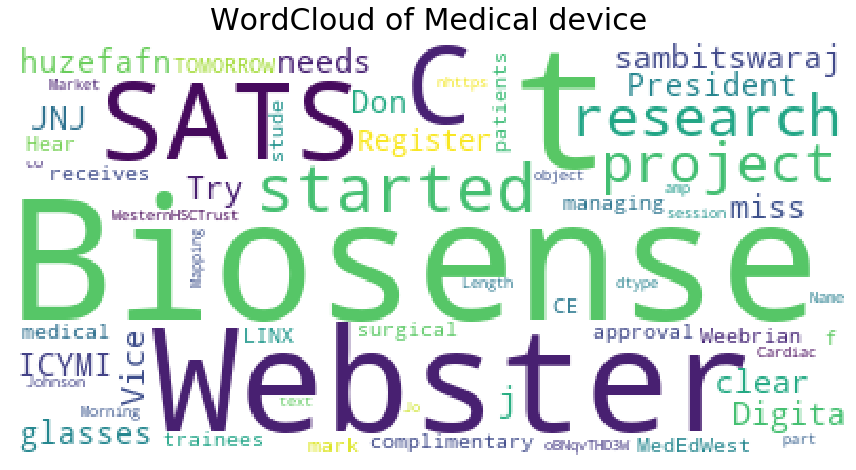

In [218]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#pos_mask = np.array(Image.open('twitter_mask.png'))
plot_wordcloud(right_class.text,color='white',max_font_size=80,title_size=30,title="WordCloud of Medical device")

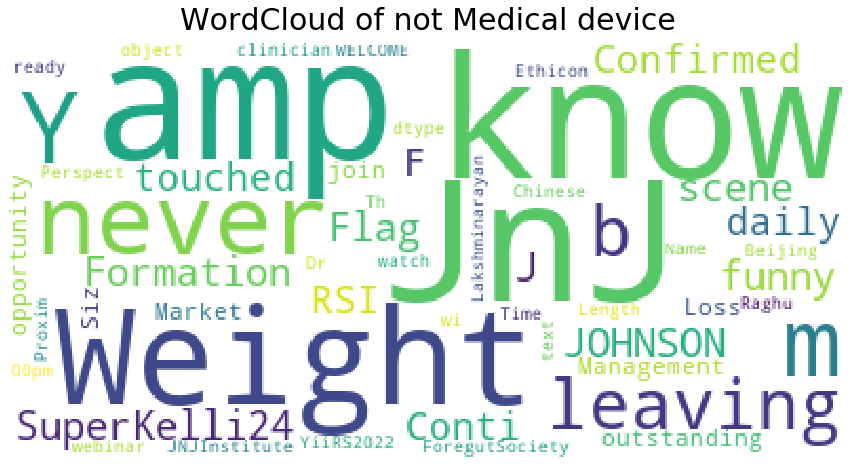

In [66]:
plot_wordcloud(wrong_class.text,color='white',max_font_size=80,title_size=30,title="WordCloud of not Medical device")

model

In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweets["text"], tweets["medical_device"],
                                                    test_size=0.2,
                                                    shuffle=True, 
                                                    stratify=tweets["medical_device"],
                                                    random_state=42)

In [74]:
df_train, df_test = train_test_split(tweets[['text','medical_device']], test_size=0.2)

In [75]:
df_train

text  medical_device
4057  @JNJNews Enjoying D. Leanne Williams presentat...           False
2433  Beyond impacting patient lives, what I love ab...           False
3403  STATEMENT from #JnJ on doses that the FDA does...           False
1452  @realDonaldTrump @FDA 2014 - ETHICON\nProduct ...            True
1685  #BWI Marshall welcomes Minute Suites https://t...           False
...                                                 ...             ...
1037  @RTandLikeSoaps #Ericole (Nicole &amp; Eric)\n...           False
659   @DarthSSnape ðŸ˜‚ðŸ¤£ GOSH! I just laughed at this! ...           False
919   @JNJGlobalHealth Hi, I wanna know is this a Am...           False
1905  #tbt...Our Medical/Food Outreach to Obere Comm...           False
3325  Proud to be a member of the LGBTQIA+ community...           False

[3712 rows x 2 columns]

In [98]:
def save_model(output_dir, nlp, new_model_name):
    ''' This Function Saves model to 
    given output directory'''
    
    output_dir = f'../working/{output_dir}'
    if output_dir is not None:        
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
        nlp.meta["name"] = new_model_name
        nlp.to_disk(output_dir)
        print("Saved model to", output_dir)

In [99]:
from spacy.training.example import Example
def train(train_data, output_dir, n_iter=20, model=None):
    """Load the model, set up the pipeline and train the entity recognizer."""
    ""
    if model is not None:
        nlp = spacy.load(output_dir)  # load existing spaCy model
        print("Loaded model '%s'" % model)
    else:
        nlp = spacy.blank("en")  # create blank Language class
        print("Created blank 'en' model")
    
    # create the built-in pipeline components and add them to the pipeline
    # nlp.create_pipe works for built-ins that are registered with spaCy
    if "ner" not in nlp.pipe_names:
        #ner = nlp.create_pipe("ner")
        nlp.add_pipe('ner', last=True)
        ner = nlp.get_pipe("ner")
    # otherwise, get it so we can add labels
    else:
        ner = nlp.get_pipe("ner")
    
    # add labels
    for _, annotations in train_data:
        for ent in annotations.get("entities"):
            ner.add_label(ent[2])

    # get names of other pipes to disable them during training
    other_pipes = [pipe for pipe in nlp.pipe_names if pipe != "ner"]
    with nlp.disable_pipes(*other_pipes):  # only train NER
        # sizes = compounding(1.0, 4.0, 1.001)
        # batch up the examples using spaCy's minibatch
        if model is None:
            nlp.begin_training()
        else:
            nlp.resume_training()


        for itn in tqdm(range(n_iter)):
            random.shuffle(train_data)
            batches = minibatch(train_data, size=compounding(4.0, 500.0, 1.001))    
            losses = {}
            for batch in batches:
#                 texts, annotations = zip(*batch)
                for text, annotations in batch:
                    doc = nlp.make_doc(text)
                    example = Example.from_dict(doc, annotations)
#                 nlp.update(texts,  # batch of texts
#                             annotations,  # batch of annotations
#                             drop=0.5,   # dropout - make it harder to memorise data
#                             losses=losses, 
#                             )
                    nlp.update([example], losses=losses, drop=0.3)
            print("Losses", losses)
    save_model(output_dir, nlp, 'st_ner')

In [100]:
def get_model_out_path(sentiment):
    '''
    Returns Model output path
    '''
    model_out_path = None
    if sentiment == True:
        model_out_path = 'models/model_pos'
    elif sentiment == False:
        model_out_path = 'models/model_neg'
    return model_out_path

In [101]:
def get_training_data(sentiment):
    '''
    Returns Trainong data in the format needed to train spacy NER
    '''
    train_data = []
    for index, row in df_train.iterrows():
        if row.medical_device == sentiment:
            selected_text = row.text
            text = row.text
            start = text.find(text)
            end = start + len(text)
            train_data.append((text, {"entities": [[start, end, 'selected_text']]}))
    return train_data

In [102]:
from tqdm import tqdm
from spacy.util import compounding
from spacy.util import minibatch
import random
import os
sentiment = True

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)
# For DEmo Purposes I have taken 3 iterations you can train the model as you want
train(train_data, model_path, n_iter=3, model=None)

  0%|          | 0/3 [00:00<?, ?it/s]

Created blank 'en' model


 33%|â–ˆâ–ˆâ–ˆâ–Ž      | 1/3 [00:09<00:19,  9.87s/it]

Losses {'ner': 1308.013655244646}


 67%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–‹   | 2/3 [00:20<00:10, 10.02s/it]

Losses {'ner': 18.528721574487257}


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 3/3 [00:30<00:00, 10.27s/it]

Losses {'ner': 1.8744831837035567}
Saved model to ../working/models/model_pos


In [103]:
sentiment = False

train_data = get_training_data(sentiment)
model_path = get_model_out_path(sentiment)

train(train_data, model_path, n_iter=3, model=None)

  0%|          | 0/3 [00:00<?, ?it/s]

Created blank 'en' model


 33%|â–ˆâ–ˆâ–ˆâ–Ž      | 1/3 [01:29<02:58, 89.13s/it]

Losses {'ner': 1057.1190324454933}


 67%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–‹   | 2/3 [04:07<01:50, 110.04s/it]

Losses {'ner': 19.01705900902718}


100%|â–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆâ–ˆ| 3/3 [06:44<00:00, 134.74s/it]

Losses {'ner': 9.92753811164133}
Saved model to ../working/models/model_neg


predicting with the trained model

In [104]:
def predict_entities(text, model):
    doc = model(text)
    ent_array = []
    for ent in doc.ents:
        start = text.find(ent.text)
        end = start + len(ent.text)
        new_int = [start, end, ent.label_]
        if new_int not in ent_array:
            ent_array.append([start, end, ent.label_])
    selected_text = text[ent_array[0][0]: ent_array[0][1]] if len(ent_array) > 0 else text
    return selected_text

In [110]:
selected_texts = []
MODELS_BASE_PATH = '../working/models/'

if MODELS_BASE_PATH is not None:
    print("Loading Models  from ", MODELS_BASE_PATH)
    model_pos = spacy.load(MODELS_BASE_PATH + 'model_pos')
    model_neg = spacy.load(MODELS_BASE_PATH + 'model_neg')
        
    for index, row in df_test.iterrows():
        text = row.text
        output_str = ""
        if row.medical_device == 'neutral' or len(text.split()) <= 2:
            selected_texts.append(text)
        elif row.medical_device == True:
            selected_texts.append(predict_entities(text, model_pos))
        else:
            selected_texts.append(predict_entities(text, model_neg))
        
df_test['selected_text'] = selected_texts

Loading Models  from  ../working/models/
